In [152]:
#@title Mount to my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Generate Thumbnails

In [153]:
!pip install ffmpy
from ffmpy import FFmpeg
!pip install pytesseract
# !pip install pillow
# !pip install imutils

from imutils.object_detection import non_max_suppression
import sys
import cv2
import numpy as np
import pytesseract
from PIL import Image
import os
import glob
import csv
import operator 
import re
import datetime
from matplotlib import pyplot as plt
%matplotlib inline  

In [0]:
import os
video_path = '/content/drive/My Drive/videos_marta/'
os.chdir(video_path)
video_list = os.listdir()

generate_thumbnails = 0

if generate_thumbnails:
  for video in glob.glob('*.mp4'):
    video_name =  video.split('.')[0]
    thumb_path = video_name + '_thumbnails/'
    if not os.path.exists(thumb_path):
      os.makedirs(thumb_path)

    ff = FFmpeg(inputs={video: None}, outputs={thumb_path + video_name + "_thumbnail%d.png": ['-vf', 'fps=3']})

    print(ff.cmd)

    # Print result
    #ffmpeg -i input.mp4 -vf fps=1 out%d.png

    ff.run()

# Extract Time Character

In [155]:
!sudo apt-get update
!sudo apt-get install tesseract-ocr
!sudo apt-get install libtesseract-dev
!pip install tesseract
!pip install tesseract-ocr

Hit:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Fetched 252 kB in 1s (302 kB/s)
Reading package lists... Done
Reading package lists... Done
Building de

In [0]:
# text detecter. may not be useful for this project

# def decode_predictions(scores, geometry):
# 	# grab the number of rows and columns from the scores volume, then
# 	# initialize our set of bounding box rectangles and corresponding
# 	# confidence scores
# 	(numRows, numCols) = scores.shape[2:4]
# 	rects = []
# 	confidences = []

# 	# loop over the number of rows
# 	for y in range(0, numRows):
# 		# extract the scores (probabilities), followed by the
# 		# geometrical data used to derive potential bounding box
# 		# coordinates that surround text
# 		scoresData = scores[0, 0, y]
# 		xData0 = geometry[0, 0, y]
# 		xData1 = geometry[0, 1, y]
# 		xData2 = geometry[0, 2, y]
# 		xData3 = geometry[0, 3, y]
# 		anglesData = geometry[0, 4, y]

# 		# loop over the number of columns
# 		for x in range(0, numCols):
# 			# if our score does not have sufficient probability,
# 			# ignore it
# 			if scoresData[x] < 0.8: # min confidence
# 				continue

# 			# compute the offset factor as our resulting feature
# 			# maps will be 4x smaller than the input image
# 			(offsetX, offsetY) = (x * 4.0, y * 4.0)

# 			# extract the rotation angle for the prediction and
# 			# then compute the sin and cosine
# 			angle = anglesData[x]
# 			cos = np.cos(angle)
# 			sin = np.sin(angle)

# 			# use the geometry volume to derive the width and height
# 			# of the bounding box
# 			h = xData0[x] + xData2[x]
# 			w = xData1[x] + xData3[x]

# 			# compute both the starting and ending (x, y)-coordinates
# 			# for the text prediction bounding box
# 			endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
# 			endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
# 			startX = int(endX - w)
# 			startY = int(endY - h)

# 			# add the bounding box coordinates and probability score
# 			# to our respective lists
# 			rects.append((startX, startY, endX, endY))
# 			confidences.append(scoresData[x])

# 	# return a tuple of the bounding boxes and associated confidences
# 	return (rects, confidences)


# layerNames = [
# 	"feature_fusion/Conv_7/Sigmoid",
# 	"feature_fusion/concat_3"]
 
# # load the pre-trained EAST text detector
# print("[INFO] loading EAST text detector...")
# net = cv2.dnn.readNet("frozen_east_text_detection.pb")

In [0]:
# TODO
# optimize below method


def get_time_text(thumb_directory):
  pic_list = os.listdir(thumb_directory)
  
  ct = 0 # for test

  for pic in pic_list:
      img_path = thumb_directory + pic

      image = cv2.imread(img_path)

      # TODO
      # crop image to focus only on time area
      cropped = image[330:380,2320:2580]

  #     plt.imshow(cropped)
  #     break

      cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2LAB)
      l, a, b = cv2.split(cropped)
      cropped = np.array(cropped)
      clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
      cl = clahe.apply(l)
      #cv2.imshow('CLAHE output', cl)

      #-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
      limg = cv2.merge((cl,a,b))
      #cv2.imshow('limg', limg)

      #-----Converting image from LAB Color model to RGB model--------------------
      cropped = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
  #     cv2.imshow('final', final)


      kernel = np.ones((2,2),np.float32)/4
      cropped = cv2.filter2D(cropped, -1, kernel)

      # Apply dilation and erosion to remove some noise
      kernel = np.ones((1, 1), np.uint8)
      cropped = cv2.dilate(cropped, kernel, iterations=1)
      cropped = cv2.erode(cropped, kernel, iterations=1)

  #     cropped = cv2.resize(cropped, (250, 70))

      plt.imshow(cropped)
    
      try:
        # TODO figure out how to restrain pytesseract to only recognize digits and AM PM
        # the below method were borrwed from online but does not really work
        config = ("-c tessedit_char_whitelist=0123456789APM --psm 6 digits")
        text = pytesseract.image_to_string(cropped, config=config)
        print(pic, text)
      except:
        print('failed to detect')



      time = check_time_format(text)   

      csvfile.write(f'{pic},{time}')

      # TODO
      # delete if not testing
      ct += 1
      if ct == 30:
        break
    
    

# Check if time format is correct

In [0]:
progtime=re.compile("^([1-9]|1[0-2]):[0-5][0-9]$")
    
      
#check if a character is integer
#3. Is the time sequential (greater) from the last time? -> if not delete
#4.Is the time sequential (greater) from the last time by more than one minute?
#5. If yes, is the time greater than the next time point? -> if yes delete
def is_number(s):
    try:
        int(s)
        return True
    except ValueError:
        pass
 
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
 
    return False


#check if time format is correct
def is_time(time):
    if re.match(progtime, time):
        return True
    else:
        return False
#check AM and PM format
def is_apm(apm):
    apm = apm.upper()
    if apm == "AM" or apm == "PM":
        return True
    else:
        return False

      
def check_time_format(result):
    
    time =""
    
    apm = ""
    
    #extract digital time and AM/PM
    for ch in result.upper():
        if (is_number(ch) or ch == ":"):
            time = time + ch
        elif (ch in 'APM') :
            apm = apm + ch
        

    outputSize = len(time) + len(apm)
    
        
    #Is it 6 or 7 characters long?  -> if not delete
    if outputSize == 6 or  outputSize == 7:
        
        #2. Are the first two digits between 1 and 12, is there a : , 
        #are the next 2 digits between 00 and 59, are the last two characters AM or PM 
        if is_time(time) and is_apm(apm):
          return f'{time} {apm}\n'
        else:
          return '\n'
 
    else:
      return '\n'
   
 

--- Start recognize text from images ---
MD--20170918075227-17_thumbnail1.png wal) UNIV}
MD--20170918075227-17_thumbnail2.png a AN
MD--20170918075227-17_thumbnail3.png Tie kew N\V,
MD--20170918075227-17_thumbnail4.png 7:54 AM
MD--20170918075227-17_thumbnail5.png 7:55 AM
MD--20170918075227-17_thumbnail6.png 7:56 AM
MD--20170918075227-17_thumbnail7.png 7:57 AM
MD--20170918075227-17_thumbnail8.png Weel NV,
MD--20170918075227-17_thumbnail9.png 7:59 AM
MD--20170918075227-17_thumbnail10.png 8:00 AM
MD--20170918075227-17_thumbnail11.png 8:01 AM
MD--20170918075227-17_thumbnail12.png 8:02 AM
MD--20170918075227-17_thumbnail13.png 8:03 AM
MD--20170918075227-17_thumbnail14.png 8:04 AM
MD--20170918075227-17_thumbnail15.png 8:04 AM
MD--20170918075227-17_thumbnail16.png 8:05 AM
MD--20170918075227-17_thumbnail17.png 8:06 AM
MD--20170918075227-17_thumbnail18.png 8:07 AM
MD--20170918075227-17_thumbnail19.png 8:08 AM
MD--20170918075227-17_thumbnail20.png 8:10 AM
MD--20170918075227-17_thumbnail21.png 8:11

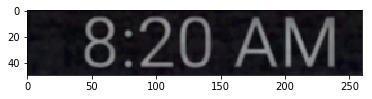

In [162]:
print ('--- Start recognize text from images ---')

thumb_directory = 'MD--20170918075227-17_thumbnails/'

csvfile = open(thumb_directory + "data.csv", "w") 

get_time_text(thumb_directory)

csvfile.close()

print ("------ Done -------")


In [0]:
import operator
import csv

# sort if necessary
def sort_data(infile, outfile):
  sortcsv = open(outfile, "w") 
  csv1 = open(infile, "r") 

  csvsort = csv.reader(csv1, delimiter=",")
  sort = sorted(csvsort,key = operator.itemgetter(0))
  for row in sort:
      #print(row)
      sortcsv.write(f'{row[0]},{row[1]}\n')

  csv1.close()
  sortcsv.close()
  print("done sorting")


In [0]:
import pandas as pd

# TODO 
# optimize below methods, may contain bugs
# check if time is in correct order
def check_time_order(infile, outfile):
  df = pd.read_csv(infile, names=['image_id','time'])

  df['hour'], df['combo'] = df['time'].str.split(':', 1).str
  del df['time']

  df['min'],df['AM/PM'] = df['combo'].str.split(' ', 1).str
  del df['combo']

  first = True

  pre = datetime.time(0,0)
  preM = ''

  now = datetime.time(0,0)
  nowM = ''

  nex = datetime.time(0,0)
  nexM = ''

  exp = datetime.time(0,0)
  
  def empty_cell(cell):
    cell['hour'] = ''
    cell['min'] = ''
    cell['AM/PM'] = ''

  for i in range(1, len(df.index) - 1):
      #only check on non empty cell
      if df.loc[i]['hour'] != '':
          #set the first prev
          if first == True:
              pre = datetime.time(int(df.loc[i]['hour']),int(df.loc[i]['min']))
              preM = df.loc[i]['AM/PM']
              first = False

          else:
              now = datetime.time(int(df.loc[i]['hour']),int(df.loc[i]['min']))
              nowM = df.loc[i]['AM/PM']

              if pre.minute < 59:
                  exp = datetime.time(pre.hour,pre.minute + 1)
              else:
                  if pre.hour < 12:
                      exp = datetime.time(pre.hour + 1,0)
                  else:
                      exp = datetime.time(1,0)

              #set next time
              for j in range(i+1, len(df.index) - 1):
                  if df.loc[j]['hour'] != '':
                      nex = datetime.time(int(df.loc[j]['hour']),int(df.loc[j]['min']))
                      nexM = df.loc[j]['AM/PM']
                      break

              #if now is different from its previous and next time range, delete
              if nowM != preM and nowM != nexM:
                empty_cell(df.loc[i])

              elif now < pre and nowM == preM and (not (pre.hour == 12 and now.hour != 12)):
                  empty_cell(df.loc[i])

              #if same AM/PM but now is greater than next, delete
              elif now > exp and now > nex and (not (now.hour == 12 and nex.hour != 12)): 
                  empty_cell(df.loc[i])

              else: 
                  pre = now
                  preM = nowM

      else:  
          empty_cell(df.loc[i])

  df.to_csv(outfile, sep='\t')     
  print ('done')
 